# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapuskasing
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | kangding
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | enriquillo
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | frankenmuth
Processing Record 18 of Set 1 | galesong
Processing Record 19 of Set 1 | mawlaik
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,286.20,82,100,4.12,CA,1686768764
1,punta arenas,-53.1500,-70.9167,280.21,65,40,8.23,CL,1686768803
2,waitangi,-43.9535,-176.5597,284.16,77,99,11.65,NZ,1686768726
3,invercargill,-46.4000,168.3500,277.20,85,100,2.08,NZ,1686768459
4,adamstown,-25.0660,-130.1015,293.89,67,2,6.32,PN,1686768733


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/aileen/Downloads/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("/Users/aileen/Downloads/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,286.20,82,100,4.12,CA,1686768764
1,punta arenas,-53.1500,-70.9167,280.21,65,40,8.23,CL,1686768803
2,waitangi,-43.9535,-176.5597,284.16,77,99,11.65,NZ,1686768726
3,invercargill,-46.4000,168.3500,277.20,85,100,2.08,NZ,1686768459
4,adamstown,-25.0660,-130.1015,293.89,67,2,6.32,PN,1686768733


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

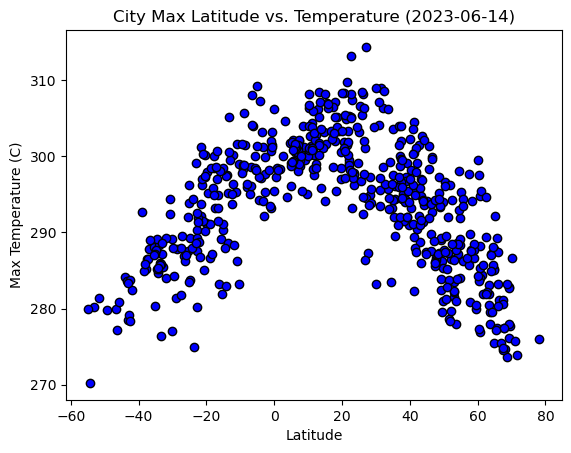

In [15]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties

plt.title(f"City Max Latitude vs. Temperature ({datetime.date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("/Users/aileen/Downloads/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

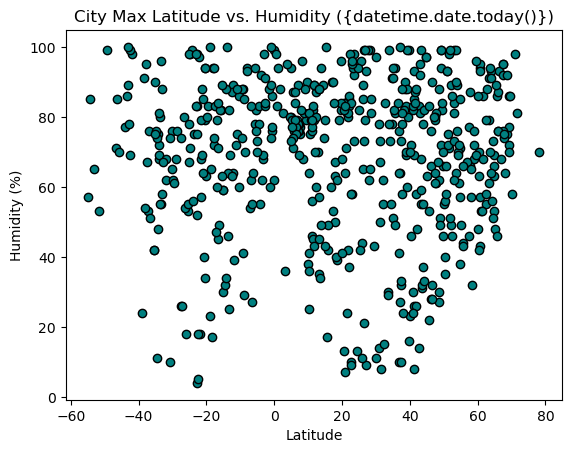

In [25]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", facecolors="teal", edgecolors="black")

# Incorporate the other graph properties

plt.title("City Max Latitude vs. Humidity ({datetime.date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("/Users/aileen/Downloads/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

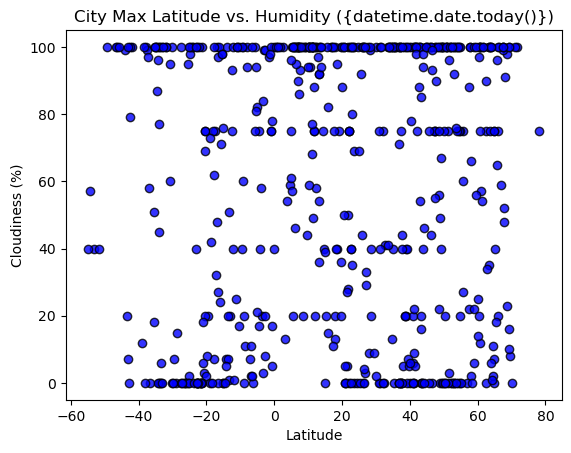

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", alpha = 0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity ({datetime.date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("/Users/aileen/Downloads/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

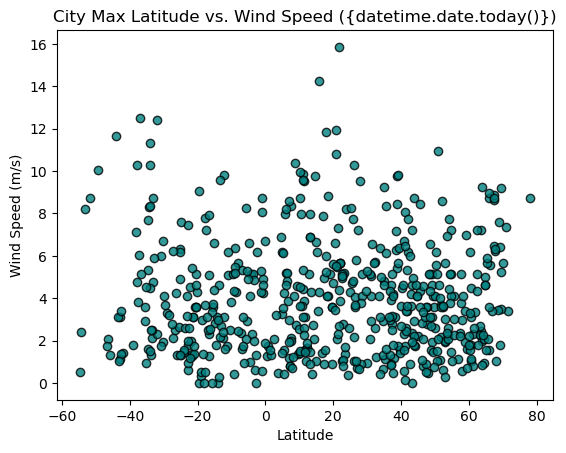

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", facecolors="teal", alpha = 0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed ({datetime.date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("/Users/aileen/Downloads/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


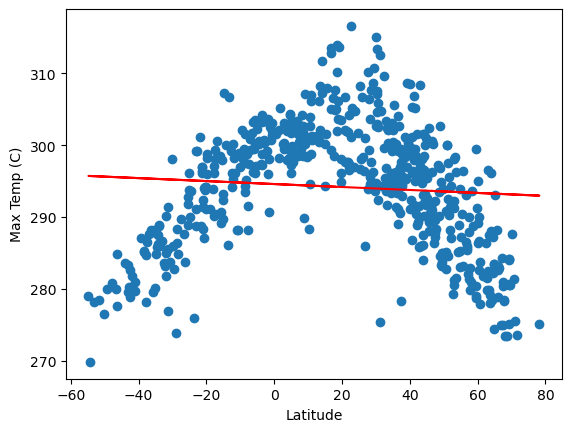

In [45]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,13.05,82,100,4.12,CA,1686769088
6,thompson,55.7435,-97.8558,13.09,44,75,4.12,CA,1686768804
9,kangding,30.0513,101.9603,10.07,97,100,0.93,CN,1686769090
10,anadyr,64.7500,177.4833,2.28,69,0,5.00,RU,1686769085
13,enriquillo,17.9000,-71.2333,28.82,63,13,6.00,DO,1686769091


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,punta arenas,-53.1500,-70.9167,7.06,65,40,8.23,CL,1686769089
2,waitangi,-43.9535,-176.5597,11.01,77,99,11.65,NZ,1686769089
3,invercargill,-46.4000,168.3500,4.05,85,100,2.08,NZ,1686769071
4,adamstown,-25.0660,-130.1015,20.74,67,2,6.32,PN,1686769089
5,edinburgh of the seven seas,-37.0676,-12.3116,14.62,76,58,12.49,SH,1686769089


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7736599569149357


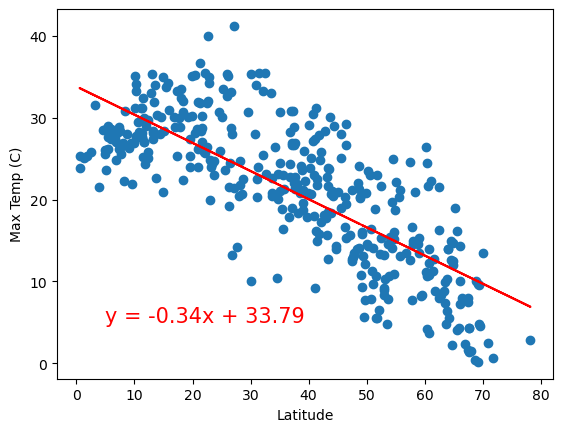

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.show()

The r-value is: 0.7674130046172627


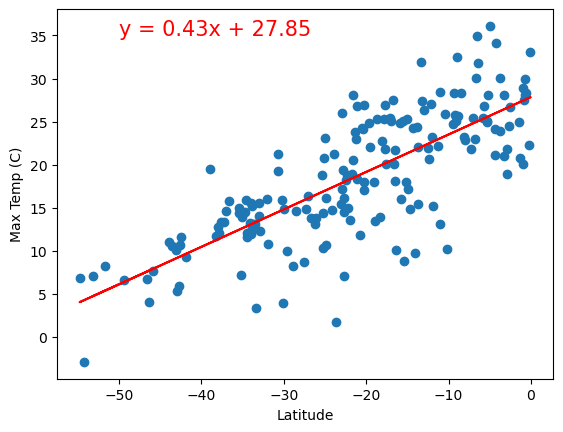

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** As the latitude increases, so does the Max Temp. An inersely as the Latitiude decrease so will the Max Temp

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0026712264780649323


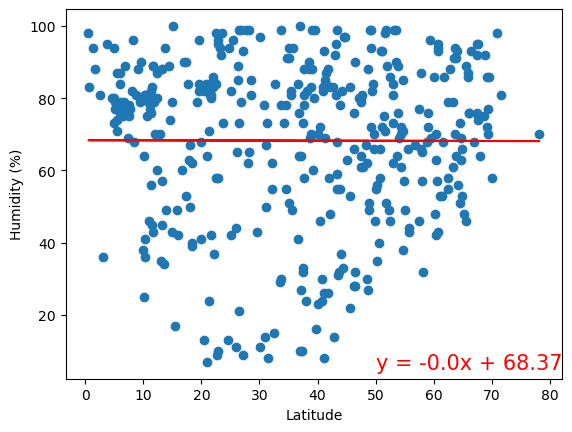

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(50,5),fontsize=15,color="red")
plt.show()

The r-value is: 0.061495680272231616


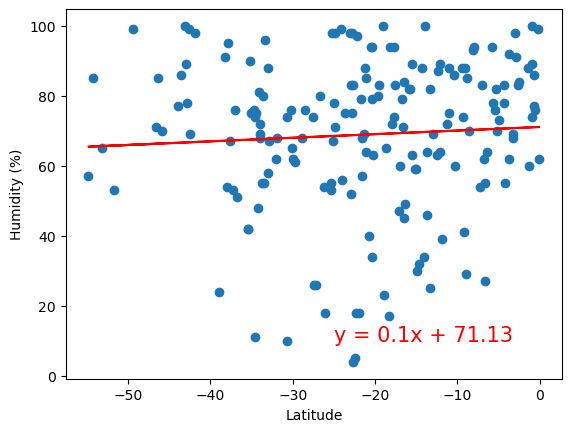

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.14568413640072325


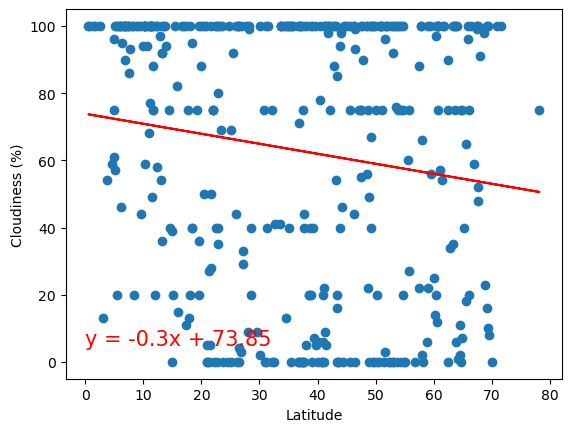

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.show()

The r-value is: -0.0534826334822261


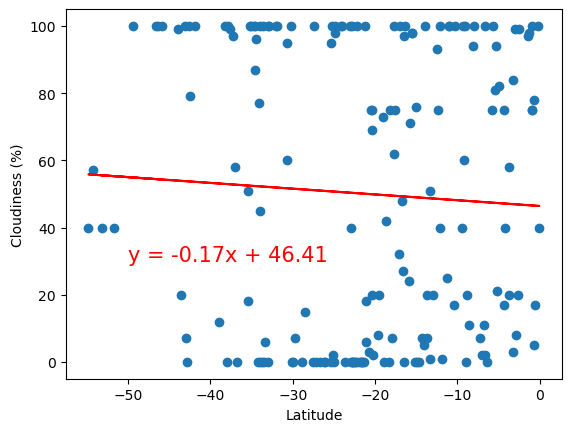

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** As the Latitude increase the cloudiness decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03354697884031449


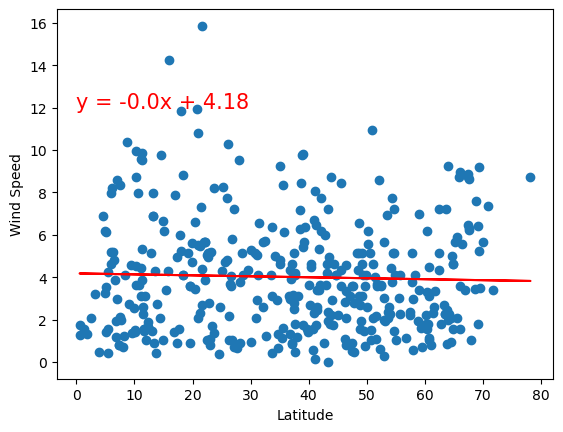

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.show()

The r-value is: -0.10765781773108893


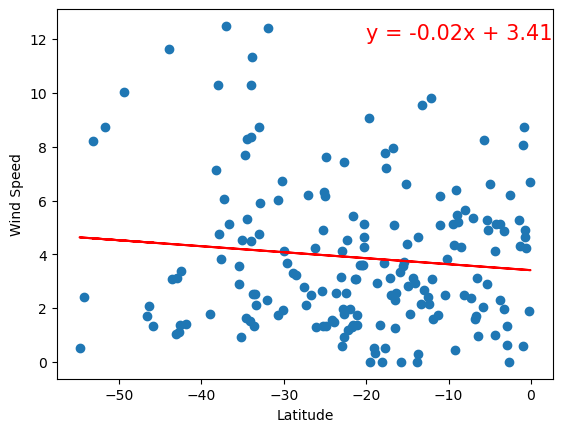

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r-value is: "+str(rvalue))
plt.annotate(line_eq,(-20,12),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** There is a minimal relationship between Wind Speed and Latitude